In [50]:
%load_ext autoreload
%autoreload 2
import dill
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

with open("../results/tone_1.kHz-default-2024-05-31T18:52:07.4.pic", "rb") as f:
    default_result = dill.load(f, ignore="True")

with open("../results/tone_1.kHz-no_inh-2024-05-31T19:09:44.0.pic", "rb") as f:
    no_inh_result = dill.load(f, ignore="True")

plt.rcParams['axes.grid'] = True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
def draw_rate_vs_angle(data):
    angle_to_rate = data["angle_to_rate"]
    name = data["conf"]["model_desc"]["name"]
    sound_key = data["conf"]["sound_key"]
    old_to_new = {
        '90': -90,
        '75': -75,
        '60': -60,
        '45': -45,
        '30': -30,
        '15': -15,
        '0': 0,
        '345': 15,
        '330': 30,
        '315': 45,
        '300': 60,
        '285': 75,
        '270': 90,
    }
    result = {}
    for angle,res in angle_to_rate.items():
        result[old_to_new[str(angle)]] = res
    
    angles = list(result.keys())

    arr_n_spikes_r_lso = [x["n_spikes_r_lso"] for angle, x in result.items()]
    arr_n_spikes_l_lso = [x["n_spikes_l_lso"] for angle, x in result.items()]
    arr_n_spikes_r_mso = [x["n_spikes_r_mso"] for angle, x in result.items()]
    arr_n_spikes_l_mso = [x["n_spikes_l_mso"] for angle, x in result.items()]
    print(arr_n_spikes_r_mso)
    
    fig, [lso, mso] = plt.subplots(2, 1)
    fig.suptitle(f"{name} with {sound_key}")
    plt.setp([lso,mso], xticks = angles)

    lso.plot(angles, arr_n_spikes_r_lso, ".-", label="right lso")
    lso.plot(angles, arr_n_spikes_l_lso, ".-", label="left lso")
    lso.set_ylabel("total spikes")
    _ = lso.legend()

    mso.plot(angles, arr_n_spikes_r_mso, ".-",  label="right mso")
    mso.plot(angles, arr_n_spikes_l_mso, ".-",  label="left mso")

    mso.set_xlabel("sound position")
    mso.set_ylabel("total spikes")
    _ = mso.legend()
    plt.tight_layout()

[147, 166, 157, 154, 134, 152, 163, 157, 151, 154, 164, 173, 160]
[204, 219, 215, 200, 191, 179, 182, 183, 206, 216, 223, 229, 233]


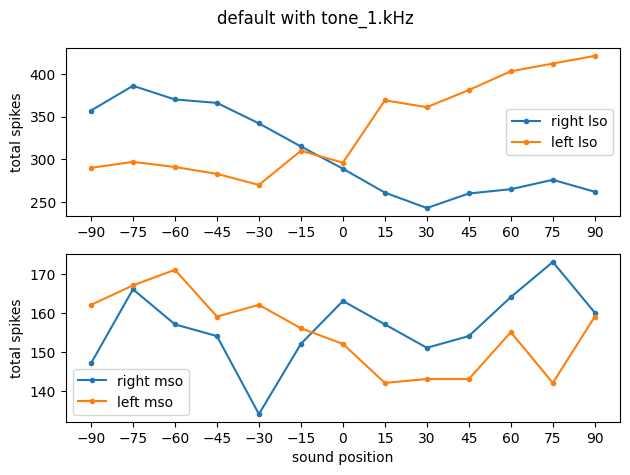

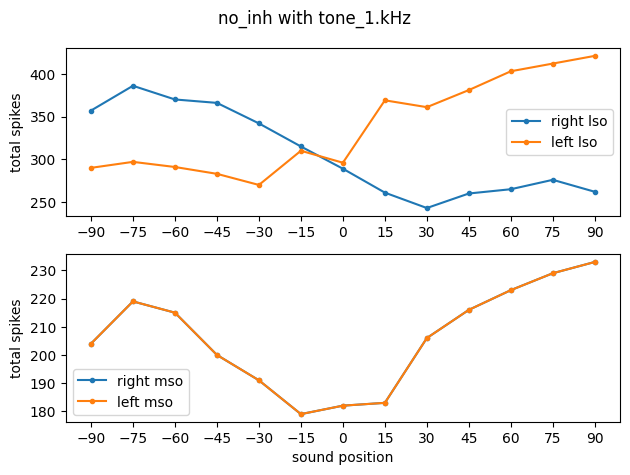

In [29]:
draw_rate_vs_angle(default_result)
draw_rate_vs_angle(no_inh_result)


In [55]:
from utils.cochlea import sounds_to_spikes
from brian2hears import Sound, IRCAM_LISTEN
from brian2 import kHz,second
from consts import Paths

sound = Sound.tone(2*kHz, 1*second)
hrtfdb = IRCAM_LISTEN(Paths.IRCAM_DIR)
hrtfset = hrtfdb.load_subject(hrtfdb.subjects[0])
# far left
hrtf = hrtfset(azim=90, elev=0)
# binaural_sound = hrtf.filterbank(sound).process().T
binaural_sound = hrtf(sound)
# print(binaural_sound)
# print(binaural_sound.left)
left, right = binaural_sound.left, binaural_sound.right
print(left, right)

# sounds_to_spikes(binaural_sound,plot_spikes=True)

Sound duration 1. s, channels 1, samplerate 44.1 kHz Sound duration 1. s, channels 1, samplerate 44.1 kHz
